In [376]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os.path import join, exists
import glob

In [377]:
from multiprocessing import cpu_count
cpu_count()

12

In [423]:
gamename='lunarlander'
directory = join('../exp_dir/', gamename)
directory

'../exp_dir/lunarlander'

In [424]:
filenames = glob.glob(directory+'/*_*100/logger.txt')
filenames

['../exp_dir/lunarlander/seed_22_gradsteps_100/logger.txt',
 '../exp_dir/lunarlander/seed_21_gradsteps_100/logger.txt',
 '../exp_dir/lunarlander/seed_20_gradsteps_100/logger.txt',
 '../exp_dir/lunarlander/seed_24_gradsteps_100/logger.txt',
 '../exp_dir/lunarlander/seed_23_gradsteps_100/logger.txt']

In [425]:
res = None
for ind, f in enumerate(filenames):
    temp = pd.read_csv(f, sep=' ')
    #temp = temp[::2]
    print('may not want to drop every second one!!!!!')
    temp.reset_index(inplace=True)
    temp.drop('index', axis=1, inplace=True)
    print('size of temp', temp.shape)
    temp['filename'] = f
    temp.reset_index(inplace=True)
    res = temp if res is None else res.append(temp)
res.shape

may not want to drop every second one!!!!!
size of temp (578, 17)
may not want to drop every second one!!!!!
size of temp (531, 17)
may not want to drop every second one!!!!!
size of temp (696, 17)
may not want to drop every second one!!!!!
size of temp (615, 17)
may not want to drop every second one!!!!!
size of temp (500, 17)


(2920, 19)

In [426]:
res.rename(columns={'index':'epochs'}, inplace=True)

In [427]:
res[res.index==max(res.index)][['test_avg_reward', 'test_cum_num_iters']]

,test_avg_reward,test_cum_num_iters
695,-30.317717,1903242


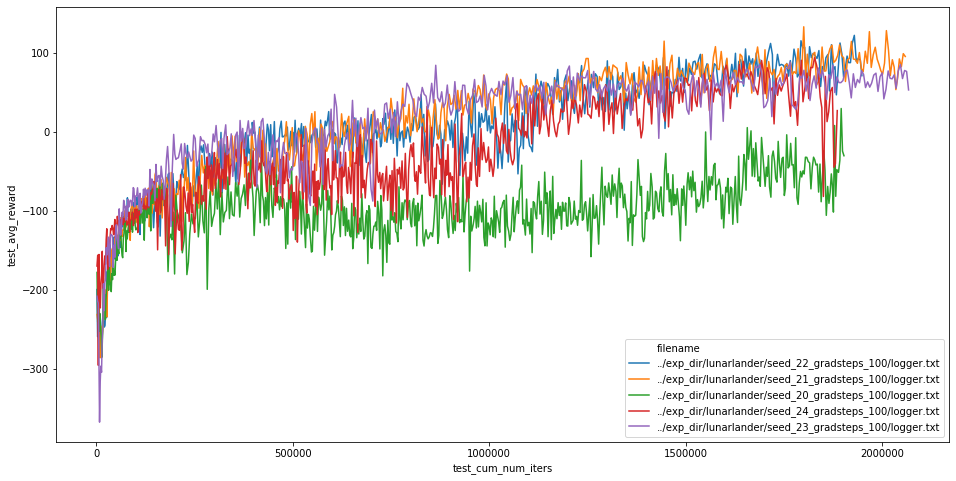

In [428]:
plt.subplots(figsize=(16, 8))
ax = sns.lineplot('test_cum_num_iters', 'test_avg_reward', 
                  hue='filename',
                        data=res)

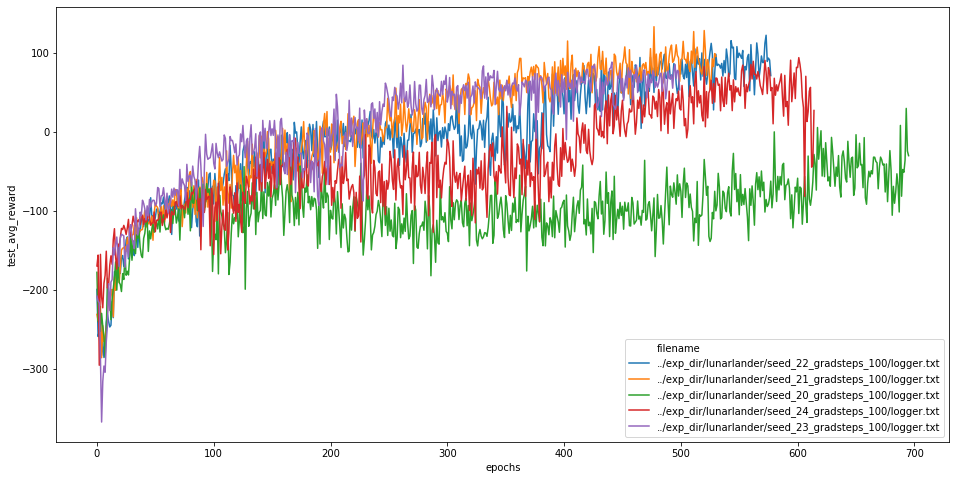

In [429]:
plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='epochs', y='test_avg_reward', hue='filename',  
                  data=res)

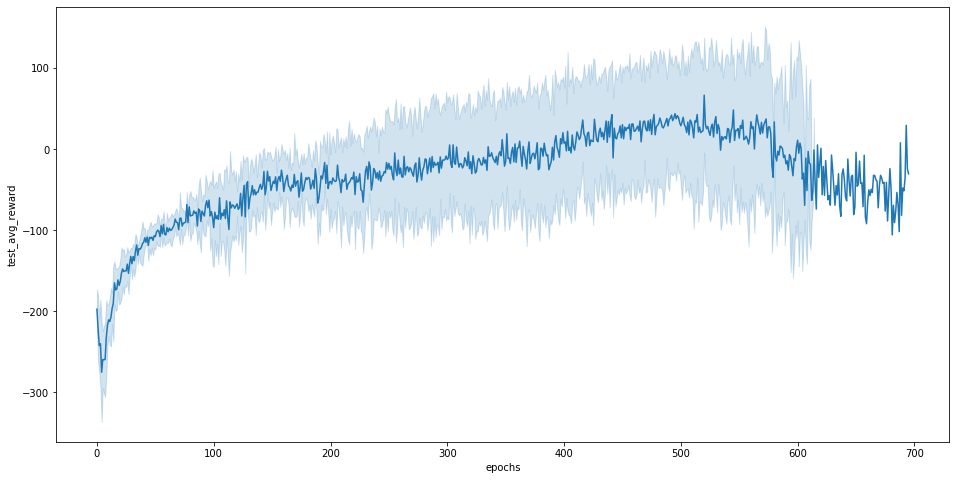

In [430]:
plt.subplots(figsize=(16, 8))
ax = sns.lineplot(x='epochs', y='test_avg_reward', ci='sd',  
                  data=res)

In [410]:
res.head()

,epochs,train_loss,train_pred_loss,test_loss,test_pred_loss,test_avg_reward,test_std_reward,test_max_reward,test_min_reward,test_avg_feef_,test_std_feef_,test_max_feef_,test_min_feef_,test_mu,test_std,test_horizon,test_cum_num_iters,Unnamed: 16,filename
0,0,1.381110,1.381110,1.396279,1.396279,-199.645121,130.670855,-67.901876,-560.407211,0.0,0.0,0.0,0.0,-200.206871,134.041929,88.315789,1678,NaN,../exp_dir/lunarlander/seed_22_gradsteps_100/l...
1,1,1.368830,1.368830,1.365043,1.365043,-259.206593,129.634250,-74.107686,-536.801514,0.0,0.0,0.0,0.0,-222.401603,127.225729,89.894737,3416,NaN,../exp_dir/lunarlander/seed_22_gradsteps_100/l...
2,2,1.359755,1.359755,1.375536,1.375536,-252.045715,119.762296,-85.999043,-513.931767,0.0,0.0,0.0,0.0,-233.005613,126.558744,91.228070,5200,NaN,../exp_dir/lunarlander/seed_22_gradsteps_100/l...
3,3,1.347149,1.347149,1.365369,1.365369,-284.305282,121.844485,4.775985,-505.987134,0.0,0.0,0.0,0.0,-241.699617,123.693355,90.093333,6875,NaN,../exp_dir/lunarlander/seed_22_gradsteps_100/l...
4,4,1.342007,1.342007,1.379349,1.379349,-283.193909,106.431633,-135.368778,-507.262371,0.0,0.0,0.0,0.0,-205.697968,89.928738,86.706667,8452,NaN,../exp_dir/lunarlander/seed_22_gradsteps_100/l...


Text(0.5, 1.0, 'Desired Horizons')

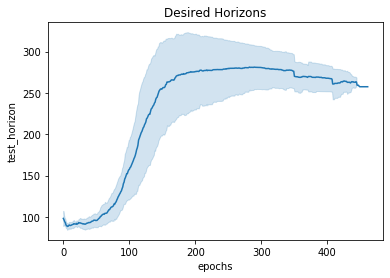

In [421]:
ax = sns.lineplot(x='epochs', y='test_horizon', ci='sd', 
                  data=res)
plt.title('Desired Horizons')

Text(0.5, 1.0, 'Min Desired Reward')

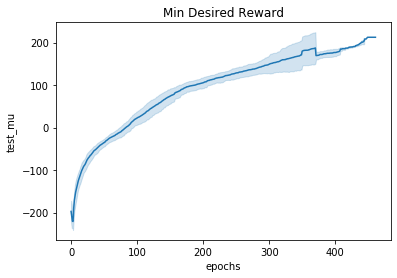

In [422]:
ax = sns.lineplot(x='epochs', y='test_mu', ci='sd', 
                  data=res)
plt.title('Min Desired Reward')

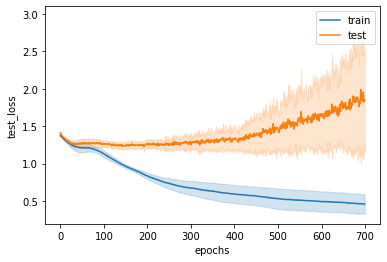

In [402]:
ax = sns.lineplot(x='epochs', y='train_loss', 
                  ci='sd',
                  data=res, label='train')
ax = sns.lineplot(x='epochs', y='test_loss', 
                  ci='sd',
                  data=res,label='test')

699     54.986176
699     71.978308
699     32.727099
699    106.610299
699     88.423355
Name: test_avg_reward, dtype: float64

In [227]:
res = pd.read_csv('../exp_dir/lunarlander/seed_20/logger.txt', sep=' ')
res.reset_index(inplace=True)

start_point = 0
end = 10000

res = res.iloc[start_point:end]

res

,index,train_loss,train_pred_loss,test_loss,test_pred_loss,test_avg_reward,test_std_reward,test_max_reward,test_min_reward,test_avg_feef_,test_std_feef_,test_max_feef_,test_min_feef_,test_mu,test_std,test_horizon,test_cum_num_iters,Unnamed: 16
0,0,1.378073,1.378073,1.417908,1.417908,-202.175491,122.249824,-50.163886,-459.964946,0.0,0.0,0.0,0.0,-194.351418,120.446159,87.842105,1669,NaN
1,1,1.363587,1.363587,1.423086,1.423086,-205.867305,97.968598,-34.888122,-362.509501,0.0,0.0,0.0,0.0,-196.021147,107.885980,91.947368,3494,NaN
2,2,1.353223,1.353223,1.432638,1.432638,-251.741650,126.200695,-80.324627,-551.480158,0.0,0.0,0.0,0.0,-213.999297,118.207601,89.877193,5123,NaN
3,3,1.347215,1.347215,1.400778,1.400778,-226.534125,78.315311,-54.465386,-397.130016,0.0,0.0,0.0,0.0,-212.803143,103.811502,89.746667,6827,NaN
4,4,1.340931,1.340931,1.379005,1.379005,-268.244920,100.002407,-52.642113,-484.881588,0.0,0.0,0.0,0.0,-185.572016,77.814768,87.866667,8555,NaN
5,5,1.335659,1.335659,1.374585,1.374585,-236.702942,119.585423,27.048665,-435.294708,0.0,0.0,0.0,0.0,-163.104571,68.347148,87.560000,10289,NaN
6,6,1.327316,1.327316,1.339885,1.339885,-291.373737,80.736837,-68.620681,-527.307580,0.0,0.0,0.0,0.0,-159.472641,66.679742,86.386667,11946,NaN
7,7,1.322282,1.322282,1.340800,1.340800,-220.528983,83.671705,-12.951939,-350.747201,0.0,0.0,0.0,0.0,-147.151311,61.376924,87.013333,13744,NaN
8,8,1.315360,1.315360,1.343531,1.343531,-191.742207,64.868074,-17.148571,-307.924939,0.0,0.0,0.0,0.0,-136.389804,57.113974,87.586667,15506,NaN
9,9,1.313760,1.313760,1.315863,1.315863,-217.623206,71.658527,-52.051509,-408.657827,0.0,0.0,0.0,0.0,-130.728321,54.679639,89.213333,17293,NaN


In [213]:
res.head(10)

,index,train_loss,train_pred_loss,test_loss,test_pred_loss,test_avg_reward,test_std_reward,test_max_reward,test_min_reward,test_avg_feef_,test_std_feef_,test_max_feef_,test_min_feef_,Unnamed: 12
0,0,1.377148,1.377148,1.422742,1.422742,-177.318543,92.012954,25.862367,-374.996540,0.0,0.0,0.0,0.0,NaN
1,1,1.361291,1.361291,1.393937,1.393937,-218.809655,111.064914,-80.983644,-455.157501,0.0,0.0,0.0,0.0,NaN
2,2,1.351472,1.351472,1.382719,1.382719,-279.192533,99.082205,-110.965151,-436.815852,0.0,0.0,0.0,0.0,NaN
3,3,1.335161,1.335161,1.373387,1.373387,-306.538379,93.871994,-55.842138,-439.815197,0.0,0.0,0.0,0.0,NaN
4,4,1.321656,1.321656,1.360039,1.360039,-320.072890,78.118645,-101.770378,-485.998860,0.0,0.0,0.0,0.0,NaN
5,5,1.315335,1.315335,1.336449,1.336449,-294.558662,119.661445,128.564595,-475.500513,0.0,0.0,0.0,0.0,NaN
6,6,1.312721,1.312721,1.330329,1.330329,-253.129180,107.899716,156.977988,-351.525492,0.0,0.0,0.0,0.0,NaN
7,7,1.299590,1.299590,1.323565,1.323565,-270.447311,54.910240,-156.738353,-362.081481,0.0,0.0,0.0,0.0,NaN
8,8,1.297799,1.297799,1.300438,1.300438,-252.347561,74.258456,-95.616346,-457.646066,0.0,0.0,0.0,0.0,NaN
9,9,1.290797,1.290797,1.316081,1.316081,-234.900821,60.212983,-75.960450,-340.629788,0.0,0.0,0.0,0.0,NaN


Text(0.5, 1.0, 'Summary losses')

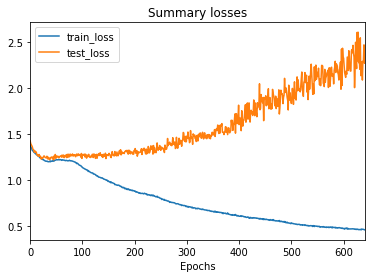

In [214]:
res.plot('index', ['train_loss', 'test_loss'])
plt.xlabel('Epochs')
plt.title('Summary losses')
#plt.ylim( -1e2, 1e3)

(0, 2)

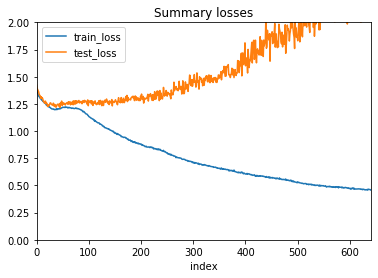

In [215]:
res.plot('index', ['train_loss', 'test_loss'])
plt.title('Summary losses')
plt.ylim( 0, 2)

Text(0, 0.5, 'Cumulative Reward')

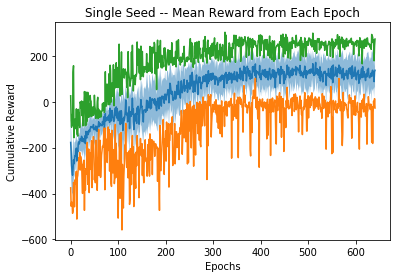

In [216]:

ax = sns.lineplot('index', 'test_avg_reward', 
                        data=res)
ax.fill_between(res["index"], y1=res["test_avg_reward"] - res["test_std_reward"], y2=res["test_avg_reward"] + res["test_std_reward"], alpha=.5)
ax.plot(res["index"], res["test_min_reward"])
ax.plot(res["index"], res["test_max_reward"])
plt.title('Single Seed -- Mean Reward from Each Epoch')
plt.xlabel('Epochs')
plt.ylabel('Cumulative Reward')

Text(0.5, 1.0, 'Rewards from Best Planner on Each Rollout')

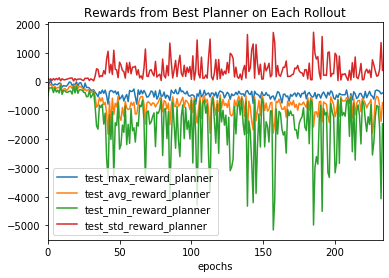

In [32]:
res.plot('index', ['test_max_reward','test_avg_reward' , 'test_min_reward', 'test_std_reward'])
plt.xlabel('epochs')
plt.title('Rewards from Best Planner on Each Rollout')

In [262]:
res.head()

,index,train_kl_loss,train_loss,train_obs_loss,train_reward_loss,test_kl_loss,test_loss,test_obs_loss,test_reward_loss,test_avg_reward_planner,test_std_reward_planner,test_max_reward_planner,test_min_reward_planner,test_avg_feef_planner,test_std_feef_planner,test_max_feef_planner,test_min_feef_planner,Unnamed: 16
0,0,0.000,1.043,0.045,0.999,0.000,0.703,0.036,0.667,-1410.973,236.220,-728.253,-1590.603,0.000,0.000,0.000,0.000,nan
1,1,0.000,0.852,0.041,0.811,0.000,0.553,0.029,0.524,-1320.833,234.162,-902.991,-1744.422,0.000,0.000,0.000,0.000,nan
2,2,0.000,0.754,0.034,0.719,0.000,0.841,0.025,0.816,-1235.053,318.657,-745.947,-1716.899,0.000,0.000,0.000,0.000,nan
3,3,0.000,0.706,0.026,0.680,0.000,1.084,0.019,1.065,-1217.795,350.790,-861.284,-1888.347,0.000,0.000,0.000,0.000,nan
4,4,0.000,0.672,0.019,0.653,0.000,0.468,0.014,0.454,-1257.873,263.113,-924.377,-1836.667,0.000,0.000,0.000,0.000,nan


Text(0.5, 1.0, 'KL loss')

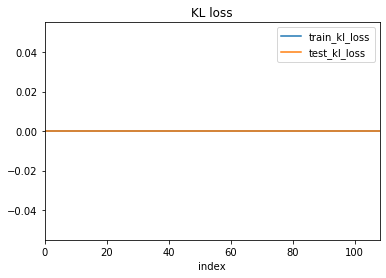

In [263]:
res.plot('index', ['train_kl_loss', 'test_kl_loss'])
plt.title('KL loss')

Text(0.5, 1.0, 'Observation loss')

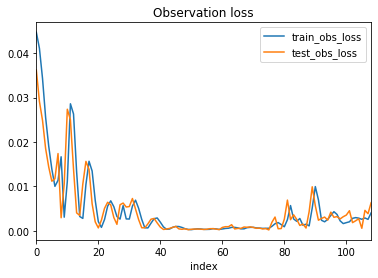

In [264]:
res.plot('index', ['train_obs_loss', 'test_obs_loss'])
plt.title('Observation loss')

Text(0.5, 1.0, 'Observation loss')

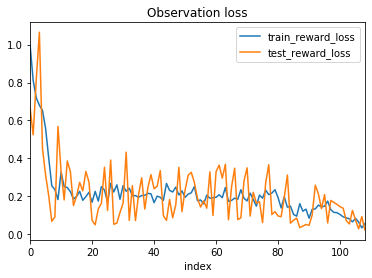

In [265]:
res.plot('index', ['train_reward_loss', 'test_reward_loss'])
plt.title('Observation loss')

<Figure size 432x288 with 0 Axes>

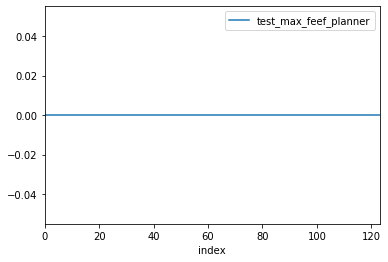

<Figure size 432x288 with 0 Axes>

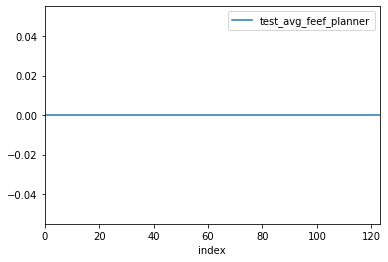

<Figure size 432x288 with 0 Axes>

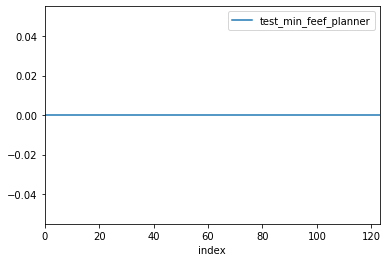

<Figure size 432x288 with 0 Axes>

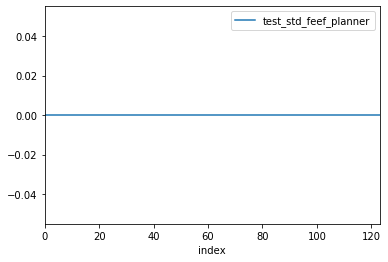

In [247]:
for val in ['test_max_feef','test_avg_feef' , 'test_min_feef', 'test_std_feef']:
    plt.figure()
    res.plot('index', val)
    plt.show()


/Users/trentonbricken/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.05, 0.05)

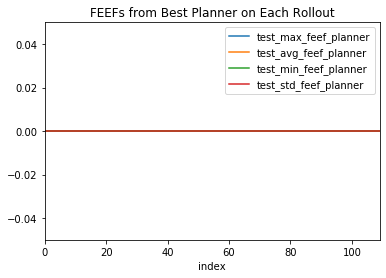

In [156]:
res.plot('index', ['test_max_feef','test_avg_feef' , 'test_min_feef', 'test_std_feef'])
plt.title('FEEFs from Best Planner on Each Rollout')
plt.ylim(res['test_min_feef'].quantile(0.5), res['test_min_feef'].quantile(1.0))


# VAE losses

Text(0.5, 1.0, 'VAE total loss')

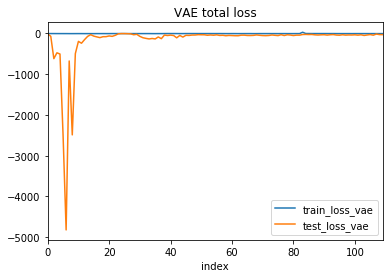

In [157]:
res.plot('index', ['train_loss_vae', 'test_loss_vae'])
plt.title('VAE total loss')

Text(0.5, 1.0, 'VAE train loss')

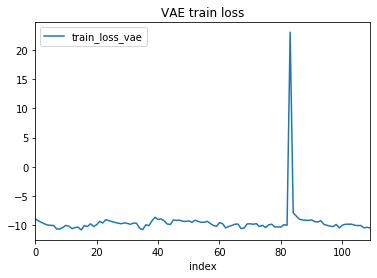

In [158]:
res.plot('index', ['train_loss_vae'])
plt.title('VAE train loss')

Text(0.5, 1.0, 'VAE test loss')

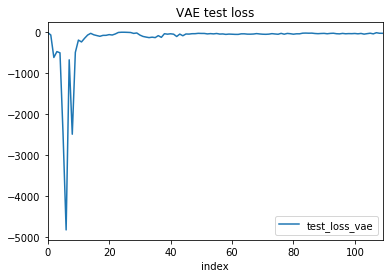

In [159]:
res.plot('index', ['test_loss_vae'])
#plt.ylim(-90000,10000)
plt.title('VAE test loss')

Text(0.5, 1.0, 'VAE Recon')

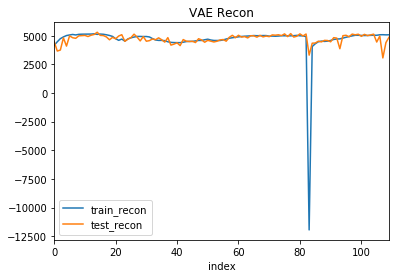

In [160]:
res.plot('index', ['train_recon', 'test_recon'])
plt.title('VAE Recon')
#plt.ylim( -1e2, 1e3)

Text(0.5, 1.0, 'VAE Recon')

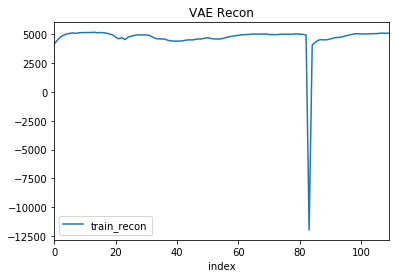

In [161]:
res.plot('index', ['train_recon'])
plt.title('VAE Recon')

Text(0.5, 1.0, 'VAE Recon')

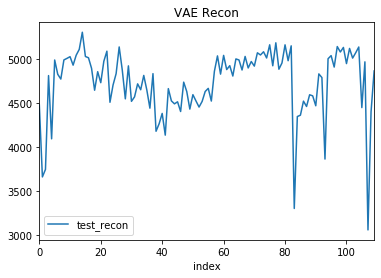

In [162]:
res.plot('index', ['test_recon'])
plt.title('VAE Recon')

Text(0.5, 1.0, 'VAE KLDs')

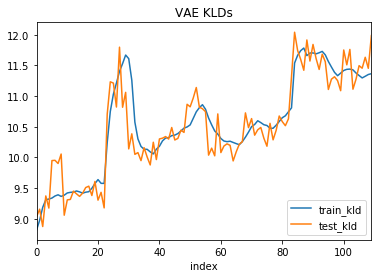

In [163]:
res.plot('index', ['train_kld','test_kld'])
plt.title('VAE KLDs')

# MDRNN losses

In [164]:
res

,index,train_bce,train_gmm,train_kld,train_loss,train_loss_mdrnn,train_loss_vae,train_mse,train_recon,test_bce,...,test_recon,test_avg_reward_planner,test_std_reward_planner,test_max_reward_planner,test_min_reward_planner,test_avg_feef_planner,test_std_feef_planner,test_max_feef_planner,test_min_feef_planner,Unnamed: 24
0,0,0.000,0.000,8.818,-1264.287,6.033,-8.946,0.288,4157.964,0.000,...,4480.550,8.300,4.846,28.007,-8.760,0.000,0.000,0.000,0.000,nan
1,1,0.000,0.000,8.974,-1658.606,5.806,-9.269,0.280,4472.380,0.000,...,3664.336,6.877,2.846,14.204,2.820,0.000,0.000,0.000,0.000,nan
2,2,0.000,0.000,9.186,-1960.387,5.600,-9.549,0.277,4746.507,0.000,...,3749.735,5.124,1.590,11.433,1.852,0.000,0.000,0.000,0.000,nan
3,3,0.000,0.000,9.309,-2118.653,5.558,-9.796,0.277,4897.409,0.000,...,4814.024,4.516,1.136,10.283,1.674,0.000,0.000,0.000,0.000,nan
4,4,0.000,0.000,9.321,-2244.575,5.520,-10.007,0.276,5016.659,0.000,...,4096.625,4.438,0.981,9.148,2.310,0.000,0.000,0.000,0.000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,0.000,0.001,11.335,1961.653,14.044,-10.098,0.698,5041.645,0.000,...,4450.999,27.946,9.415,67.742,3.536,0.000,0.000,0.000,0.000,nan
106,106,0.000,0.001,11.296,2042.262,14.148,-10.088,0.711,5084.599,0.000,...,4969.848,27.940,10.265,60.201,4.701,0.000,0.000,0.000,0.000,nan
107,107,0.000,0.001,11.322,1994.797,14.480,-10.484,0.707,5090.885,0.000,...,3063.204,28.790,9.678,72.928,4.064,0.000,0.000,0.000,0.000,nan
108,108,0.000,0.001,11.351,2047.265,14.529,-10.399,0.710,5076.943,0.000,...,4403.737,28.007,9.201,49.586,6.419,0.000,0.000,0.000,0.000,nan


Text(0.5, 1.0, 'MDRNN Reward Predictions')

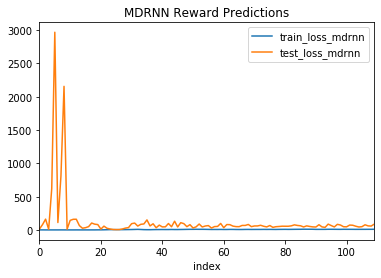

In [165]:
res.plot('index', ['train_loss_mdrnn', 'test_loss_mdrnn'])
plt.title('MDRNN Reward Predictions')

Text(0.5, 1.0, 'MDRNN Reward Predictions MSE')

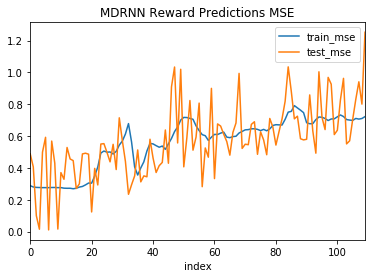

In [166]:
res.plot('index', ['train_mse', 'test_mse'])
plt.title('MDRNN Reward Predictions MSE')

Text(0.5, 1.0, 'MDRNN GMM')

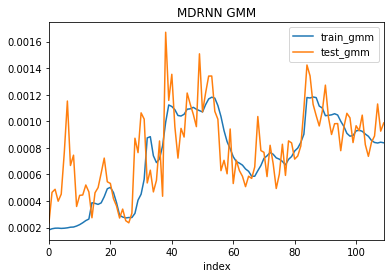

In [167]:
res.plot('index', ['train_gmm', 'test_gmm'])
plt.title('MDRNN GMM')

## CTRL losses from CMA-ES

In [54]:
ctrl_training = pd.read_csv('../exp_dir/joint/ctrl_logger.txt', sep=' ')
ctrl_training.reset_index(inplace=True)
ctrl_training.head(20)

,index,generation,time,avg_rew,min_rew,max_rew,std_rew,dist_std,mean_run_time,max_run_time,avg_feef,min_feef,max_feef,std_feef,Unnamed: 13
0,0,1,186,-44.87,-114.17,42.38,37.59,0.10000,979.81,1000.0,-1.073732e+08,-3.674780e+08,-8856252.0,1.234808e+08,NaN
1,1,2,371,-58.80,-99.06,-18.84,20.46,0.09932,971.01,1000.0,-5.309192e+07,-1.533834e+08,-20006486.0,4.529390e+07,NaN
2,2,3,553,-77.90,-131.80,-38.16,20.27,0.09869,924.56,1000.0,-1.138007e+08,-3.173062e+08,-25348064.0,7.699742e+07,NaN
3,3,4,742,-59.54,-83.47,-15.61,17.50,0.09809,980.82,1000.0,-5.264471e+07,-2.000322e+08,-10920720.0,5.235288e+07,NaN
4,4,5,934,-71.16,-102.35,-34.53,15.70,0.09752,975.89,1000.0,-1.249562e+08,-3.571849e+08,-20697808.0,1.047135e+08,NaN
5,5,1,189,-47.52,-81.92,-21.03,19.39,0.10000,1000.00,1000.0,-9.962144e+06,-3.633393e+07,-832397.0,8.435982e+06,NaN
6,6,2,378,-25.61,-71.20,92.89,35.14,0.09932,1000.00,1000.0,-4.055991e+07,-1.254717e+08,-3143666.0,3.429460e+07,NaN
7,7,3,571,-31.12,-60.83,38.97,23.46,0.09869,1000.00,1000.0,-5.172101e+07,-1.040552e+08,-10327345.0,2.853345e+07,NaN
8,8,4,761,-34.87,-58.01,-15.24,12.18,0.09810,1000.00,1000.0,-7.843077e+07,-1.362723e+08,-19268732.0,3.096346e+07,NaN
9,9,5,952,-41.47,-67.40,-21.39,14.23,0.09753,1000.00,1000.0,-1.266590e+08,-2.274661e+08,-31276722.0,5.238292e+07,NaN


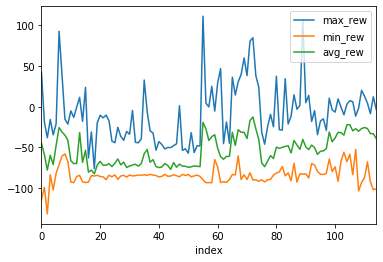

In [48]:
ctrl_training.plot('index', ['max_rew', 'min_rew', 'avg_rew'])

<Figure size 432x288 with 0 Axes>

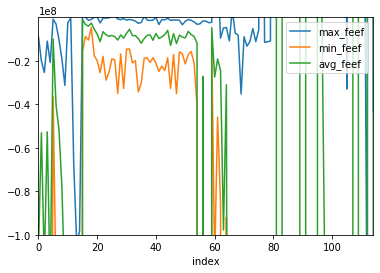

In [49]:
plt.figure()
ctrl_training.plot('index', ['max_feef', 'min_feef', 'avg_feef'])
plt.ylim(-1e8, -1e2)
plt.show()